# Visualização e análise de dados de turismo de Maceió

Os dados utilizados nas análises e visualizações a seguir foram retirados do observatório de turismo de maceió

http://observatorioturismo.maceio.al.gov.br/indicadores-rodoviaria/

## RODOVIÁRIA
A Sociedade Nacional de Apoio Rodoviário e Turístico - SINART que atualmente administra o Terminal Rodoviário João Paulo II - Maceió Alagoas, nos encaminha o relatório da movimentação de passageiros Intermunicipais, Interestaduais e Complementares Intermunicipais na Rodoviária de Maceió.
Os dados abordados nos gráficos a seguir é uma análise do histórico da movimentação mensal e anual de passageiros embarcados a partir de 2014 até os dias atuais.

Dados atualizados no terceiro trimestre de 2018

## Forecasting
` TODO: Escrever sobre forecasting`

### Pré-requisitos

#### Requisitos do sistema
É recomndado utilizar uma máquina com no mínimo 2GB de memória livre.

#### Bibliotecas
- numpy
- cython
- pandas
- pystan
- fbprophet
- matplotlib

In [1]:
# Comando para instalar os requisitos
# !pip install numpy
# !pip install pandas
# !pip install cython
# !pip install matplotlib
# !pip install pystan --no-cache-dir --no-binary :all:
# !pip install fbprophet --no-cache-dir --no-binary :all:

In [2]:
import pandas as pd

# flattening list    
flatten = lambda l: [item for sublist in l for item in sublist]

# importando dataset
df = pd.read_csv("data-v1/indicadores-rodoviaria.csv")
df

,MÊS,2014,2015,2016,2017,2018
0,01 - JAN,81497,85569,71230,63747,67168.0
1,02 - FEV,56461,67882,59154,50490,51932.0
2,03 - MAR,65054,48974,52542,47874,46468.0
3,04 - ABR,64323,57019,47107,45607,45857.0
4,05 - MAI,55442,56778,47746,42812,40983.0
5,06 - JUN,55228,52530,47336,42831,44748.0
6,07 - JUL,56295,52143,52280,46956,49190.0
7,08 - AGO,54846,49038,43412,43393,44999.0
8,09 - SET,50635,53606,45550,38604,44477.0
9,10 - OUT,58343,56439,47469,46479,NaN


In [3]:
df_transposed = df.transpose()
df_transposed.loc['MES_NUMBERS'] = [ x[0:2] for x in df_transposed.loc['MÊS']]
dates = [ year + "-" + df_transposed.loc['MES_NUMBERS']  for year in df.columns[1:].values]
dates = flatten(dates)
passengers = df_transposed.drop(['MÊS','MES_NUMBERS']).values.flatten()

In [4]:
ts_df = pd.DataFrame({'ds': dates, 'y': passengers})
ts_df['ds'] = pd.DatetimeIndex(ts_df['ds'])
ts_df

,ds,y
0,2014-01-01,81497
1,2014-02-01,56461
2,2014-03-01,65054
3,2014-04-01,64323
4,2014-05-01,55442
5,2014-06-01,55228
6,2014-07-01,56295
7,2014-08-01,54846
8,2014-09-01,50635
9,2014-10-01,58343


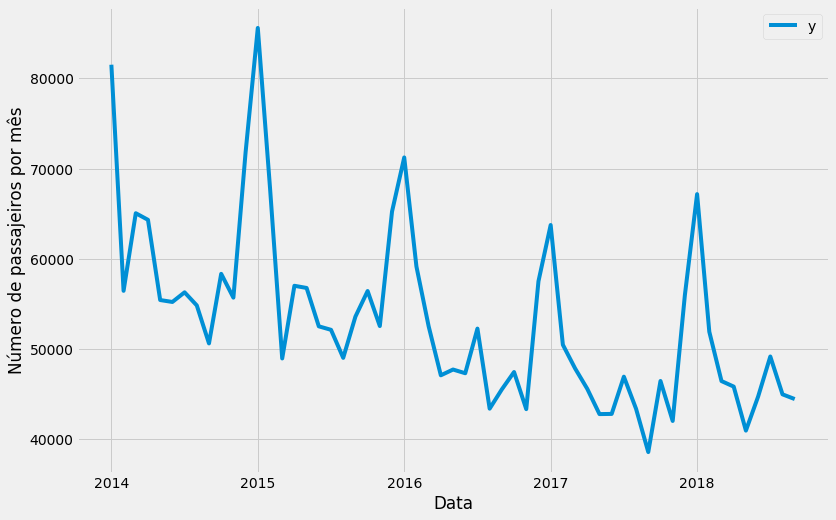

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

ax = ts_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Número de passajeiros por mês')
ax.set_xlabel('Data')

plt.show()

In [6]:
from fbprophet import Prophet
model = Prophet(interval_width=0.95)
model.fit(ts_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = model.make_future_dataframe(periods=12, freq = 'm')
future.tail()

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
67,2019-07-31,42266.725281,36858.434511,47858.561579
68,2019-08-31,43260.582519,37993.032508,48744.827927
69,2019-09-30,45870.692277,40384.275183,51686.031930
70,2019-10-31,42540.321601,37188.611319,48305.203172
71,2019-11-30,55815.155129,50383.762462,61273.958495


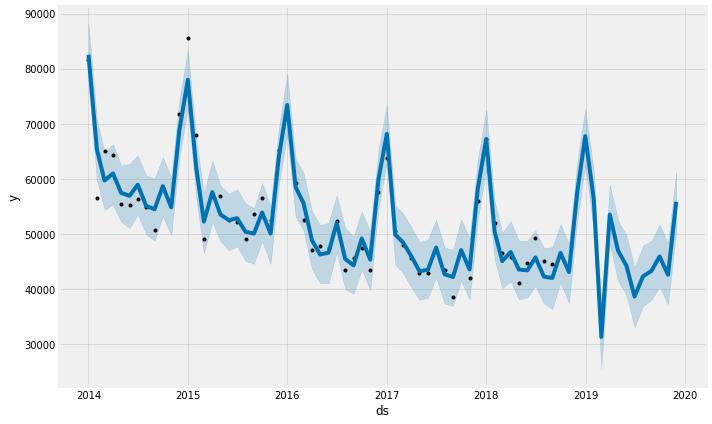

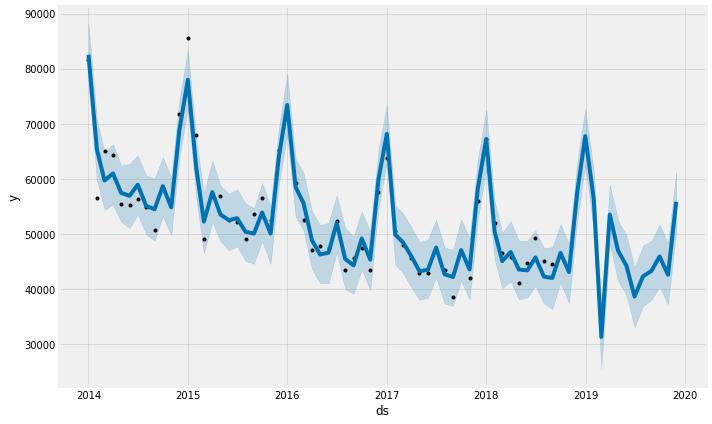

In [8]:
model.plot(forecast,uncertainty=True)

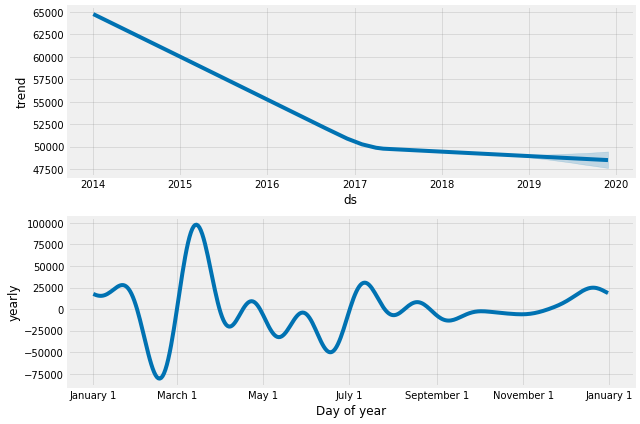

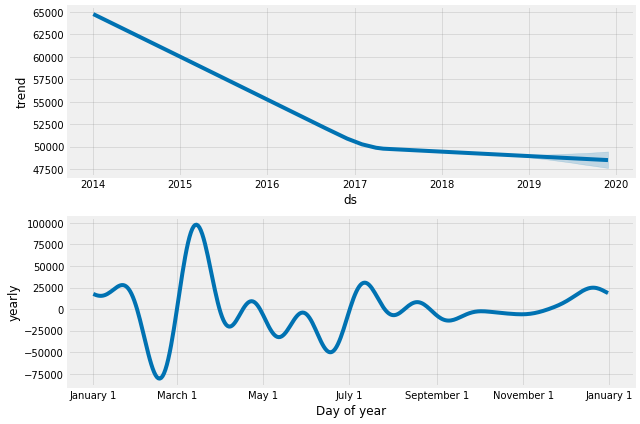

In [9]:
model.plot_components(forecast)

## Referências

- https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3
- https://github.com/urgedata/pythondata/blob/master/fbprophet/fbprophet_part_one.ipynb
- https://facebook.github.io/prophet/docs/quick_start.html#python-api